# The value of drought monitor information

* **Compatibility:** 
* **Products used:** [UniSQ Drought Monitor Data](https://eprints.usq.edu.au/48151/)

## Background

Current federal, state, and municipal policies seek to provide assistance to minimise the economic and environmental impacts of droughts. However, identifying the optimal allocation of these financial resources is complicated because droughts impose societal costs unevenly across the landscape and over time. For this reason, it is desirable for decision-makers in drought management to have the best posible understanding of the location, timing, and severity of droughts. 

## Decision model

Estimation of the economic impact of the information requires an explanation of how a decision-maker changes her decision as a result of the acquisition of new information and a way to quantify that value. For a given decision problem, information structures can provide different qualities of information that will lead to potentially different expected payoffs that need to be maximised for an optimal decision (An-Vo et al. 2019a&b, An-Vo et al. 2021). The optimal decision here is the optimal drought assistance provided to farmers in a local region (Local Government Administration (LGA)) to achieve the maximum payoff in reducing the drought impacts. 

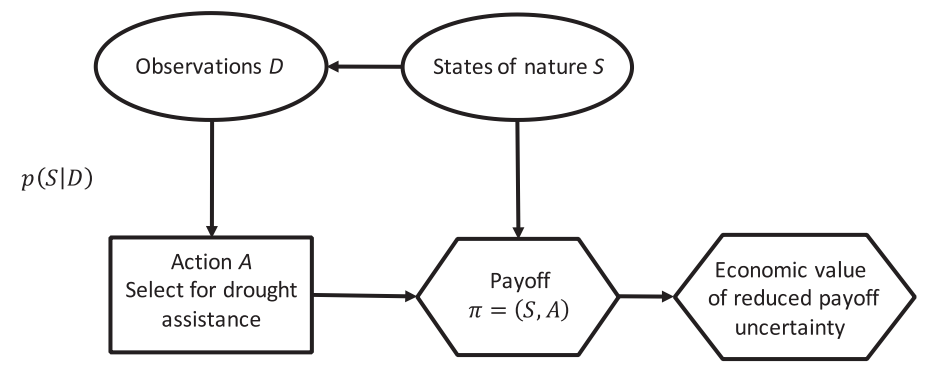

Figure 1: Influence diagram describing the decision problem of issuing financial assistance.

### Bayesian approach

 
$S_{i,t}$: the intensity of drought in a LGA $i$ in month $t$; assumed by decision makers to be a normal distribution $N(\mu_{S_{i,t}}, \sigma^2_{S_{i,t}})$  

$d_{i,t}$: a drought category of a LGA $i$ in month $t$, which is the CDI value provided by the Australian Drought monitor

$D_{i,t}$: the drought category of a LGA $i$ in the previous month, assumed to be a normal distribution $N(\mu_{D_{i,t}}, \sigma^2_{D_{i,t}})$ 

$\rho$: the correlation coefficient between $S_{i,t}$ and $D_{i,t}$

The distribution of $S_{i,t}$, conditional on observing $D_{i,t} = d_{i,t}$, is given by
\begin{equation}\label{ceq}
    \left(S_{i,t}|D_{i,t} = d_{i,t}\right)
    \mathtt{\sim}
    N\left\{
    \mu_{S_{i,t}}+\rho\frac{\sigma^2_{S_{i,t}}}{\sigma^2_{D_{i,t}}}\left(d_{i,t}-\mu_{D_{i,t}}\right), 
    \left(1-\rho^2\right)\sigma^2_{S_{i,t}}
    \right\}. \tag{1}
\end{equation}

This is the decision maker's posterior probability distribution, where the conditional posterior mean is equal to

\begin{equation}\label{meq}
    \mathtt{E}\left[S_{i,t}|D_{i,t}=d_{i,t}\right]  = \mu_{S_{i,t}}+\rho\frac{\sigma^2_{S_{i,t}}}{\sigma^2_{D_{i,t}}}\left(d_{i,t}-\mu_{D_{i,t}}\right), \tag{2}
\end{equation}

and the conditional posterior variance is equal to
\begin{equation}\label{veq}
    \mathtt{Var}\left[S_{i,t}|D_{i,t}=d_{i,t}\right]  = \left(1-\rho^2\right)\sigma^2_{S_{i,t}}. \tag{3}
\end{equation}

Equation (\ref{veq}) shows that the conditional posterior variance is decreasing in the correlation coefficient $\rho$. The relationship indicate that any change in the drought monitor that increases $\rho$, that is, the correlation between the 
CDI-based drought category assigned to a LGA and the actual drought intensity in that LGA, can reduce the variance that the decision-maker faces. 

### Value of information

The most effective decision is to use the expected value of a probability distribution of payoffs (Berger 1985). We apply a quadratic payoff function in the eligibility selection decision. Suppose that the risk neutral decision-maker's payoff associated with an action $A_{i,t}$ can be represented as being quadratic in the level of the action and the intensity of drought $S_{i,t}$:

\begin{equation}\label{peq}
    \Pi\left(S_{i,t}, A_{i,t}\right) = \beta_1 + \beta_2 S_{i,t} + \beta_3 A_{i,t} + \beta_4 S_{i,t} A_{i,t}
                                  + \beta_5 S^2_{i,t} - \beta_6 A^2_{i,t}, \tag{4}
\end{equation}

$A_{i,t}$: the amount of drought assistance allocated to a LGA $i$ in month $t$ 

$\Pi\left(S_{i,t}, A_{i,t}\right)$: the payoff represents the value of losses in the agricultural sector that were avoided, given that the LGA experienced a drought of intensity $S_{i,t}$ and received drought assistance in the amount of $A_{i,t}$  

Derivation of the first-order condition shows that the optimal prior choice is 
\begin{equation}\label{pceq}
    A^*_{i,t} = \beta_3 + \frac{\beta_4}{2\beta_6} \mu_{S_{i,t}}, \tag{5}
\end{equation}

while the optimal conditional choice is

\begin{equation}\label{cceq}
    \left(A^*_{i,t}|D_{i,t}=d_{i,t}\right) = \beta_3 + \frac{\beta_4}{2\beta_6} \mathtt{E}\left[S_{i,t}|D_{i,t}=d_{i,t}\right], \tag{6}
\end{equation}

The value of information was shown to be (Lawrence 1999)

\begin{equation}
    VOI = \kappa_1\left(\rho^2 \sigma^2_{S_{i,t}}\right), \tag{7}
\end{equation}

where $\kappa_1$ is a constant. The VOI is thus proportional to the variance of drought and the square of the correlation coefficient.

## Description

The Australian Drought Minitor (ADM) is an expert-based risk map that provides information about the severity of droughts across the Australian continent on a monthly basis and can be used to inform major drought management decisions. These maps are used to determine farmer eligibility for federal drought assistance programs and issue drought emergency declarations. 

## Getting started

In [1]:
# Loading modules and packages
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import json
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature import ShapelyFeature
from cartopy.io.shapereader import Reader
import numpy as np
import netCDF4
from netCDF4 import num2date, date2num, date2index  # To deal with time variables
from scipy import signal
import math
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import mapclassify as mc

In [2]:
# Loading required data other than the drought monitor data
stations = r'stations.csv'                                                # Data regarding information for studied sites
#wheat_yield = r'WheatYields.csv'                                          # Wheat yield data for studied sites
wheat_yield = r'Mean_yield_at_sites.csv'                                   # Wheat yield data based on APSIM simulation
states_path = 'STE_2021_AUST_GDA2020.shp'                                 # Shapefile for Australia states
#states_path = r'states.geojson'
#aus_states = json.load(open(states_path))
state_feature = ShapelyFeature(Reader(states_path).geometries(),          # Get the state features for later mapping
                               crs=ccrs.PlateCarree(), 
                               edgecolor = 'black')
shapefile = gpd.read_file(states_path)
shapefile

,geometry
0,"MULTIPOLYGON (((159.06230 -31.50886, 159.06218..."
1,"MULTIPOLYGON (((146.29286 -39.15778, 146.29341..."
2,"MULTIPOLYGON (((142.53140 -10.68301, 142.53072..."
3,"MULTIPOLYGON (((140.66025 -38.06256, 140.66006..."
4,"MULTIPOLYGON (((117.86953 -35.19108, 117.86961..."
5,"MULTIPOLYGON (((144.60439 -41.01001, 144.60443..."
6,"MULTIPOLYGON (((133.02818 -10.90839, 133.02982..."
7,"POLYGON ((149.06239 -35.15910, 149.09134 -35.1..."
8,"MULTIPOLYGON (((167.94747 -29.12757, 167.94748..."
9,None


In [3]:
# Loading the data
df_station = pd.read_csv(stations, sep = r'\s*,\s*', engine = 'python')
df_yield = pd.read_csv(wheat_yield, sep = r'\s*,\s*', engine = 'python')

In [4]:
df_station

,Sites,Weather Station,Zones,Wheat price ($/t),Regions,Input cost without N ($/ha),Zonal names,Latitude,Longitude
0,Goondiwindi,41038,2,238,1,216.4,NSW NE/QLD SE,-28.55,150.31
1,Meandarra,42022,2,238,1,216.4,NSW NE/QLD SE,-27.33,149.88
2,Dalby,41023,2,238,1,216.4,NSW NE/QLD SE,-27.18,151.26
3,Roma,43030,3,237,1,202.8,NSW NW/QLD SW,-26.57,148.79
4,Emerald,35027,1,246,1,284.6,QLD Central,-23.53,148.16
5,Condobolin,50052,5,234,1,207.8,NSW Central,-33.07,147.23
6,Wellington,65028,4,235,1,213.6,NSW Vic Slopes,-32.80,148.80
7,Dubbo,65012,2,238,1,216.4,NSW NE/QLD SE,-32.24,148.61
8,Gilgandra,51018,2,238,1,216.4,NSW NE/QLD SE,-31.71,148.66
9,Nyngan,51039,5,234,1,207.8,NSW Central,-31.55,147.20


In [5]:
df_yield

,Year,Goondiwindi,Meandarra,Dalby,Roma,Emerald,Condobolin,Wellington,Dubbo,Gilgandra,...,Merredin,SouthernCross,WonganHills,Bencubbin,Badgingarra,Dalwallinu,Carnamah,Morawa,Geraldton,Mullewa
0,1998,2.015614,1.935463,2.250056,1.240877,2.069850,2.702109,2.077675,2.649925,2.427008,...,0.225473,0.093965,2.474710,0.228421,1.909753,1.988273,1.211417,1.047347,1.705110,0.282711
1,1999,2.350825,0.627778,1.034079,0.331025,1.241081,1.696792,2.583937,1.871578,1.747102,...,1.154185,0.406857,3.066597,1.371445,2.189324,2.122239,1.738980,1.809156,1.732562,0.437747
2,2000,0.144661,0.157926,0.400499,0.159769,1.085454,0.930998,3.365606,1.354280,1.246968,...,0.425967,0.308988,1.939973,0.952368,1.928746,1.597089,1.581251,0.858804,2.033100,0.468956
3,2001,2.860485,0.537067,0.773943,0.578990,1.281221,1.466995,2.447494,2.219185,1.657603,...,1.151991,0.567540,2.291714,1.270878,2.422961,2.046744,2.262721,1.032113,2.394748,0.578456
4,2002,0.863387,0.341278,0.557877,0.122847,1.288182,0.364301,0.659911,1.050012,1.076600,...,0.413224,0.072597,1.847621,0.803520,2.186862,1.007650,1.468315,0.851192,1.935787,0.440271
5,2003,0.605610,0.551320,0.414458,0.277534,1.458143,0.256635,0.234927,0.256963,0.149369,...,1.599825,0.588851,2.801615,1.719056,2.030502,2.098857,2.057201,1.497156,2.231052,0.765297
6,2004,0.897002,0.395936,0.405277,0.130045,1.157622,0.572422,2.254045,0.641044,0.476687,...,0.180395,0.294379,2.195223,1.444353,2.130506,1.756336,1.833834,1.121767,2.189783,0.583675
7,2005,2.088907,0.780382,0.481163,0.125312,1.685324,1.670825,2.720930,2.103393,1.906818,...,0.427032,0.442762,2.282953,0.562004,2.022678,1.881825,1.874229,1.314805,2.045958,0.729330
8,2006,1.126462,0.969644,0.834236,0.217161,1.771364,0.319872,1.077798,0.824214,0.727450,...,0.371737,0.177435,1.419107,0.715036,1.922073,0.987377,1.120429,0.391059,1.296056,0.217451
9,2007,0.941233,0.757398,0.985449,0.427838,1.452269,0.420225,1.596810,1.322834,1.064983,...,0.252591,0.553761,2.057121,0.933812,2.341617,1.519086,1.367461,0.907355,1.694369,0.447235


In [6]:
# using geopandas to convert long and lat to points
df_geo = gpd.GeoDataFrame(df_station, geometry = gpd.points_from_xy(
df_station.Longitude, df_station.Latitude))    

In [7]:
df_geo

,Sites,Weather Station,Zones,Wheat price ($/t),Regions,Input cost without N ($/ha),Zonal names,Latitude,Longitude,geometry
0,Goondiwindi,41038,2,238,1,216.4,NSW NE/QLD SE,-28.55,150.31,POINT (150.31000 -28.55000)
1,Meandarra,42022,2,238,1,216.4,NSW NE/QLD SE,-27.33,149.88,POINT (149.88000 -27.33000)
2,Dalby,41023,2,238,1,216.4,NSW NE/QLD SE,-27.18,151.26,POINT (151.26000 -27.18000)
3,Roma,43030,3,237,1,202.8,NSW NW/QLD SW,-26.57,148.79,POINT (148.79000 -26.57000)
4,Emerald,35027,1,246,1,284.6,QLD Central,-23.53,148.16,POINT (148.16000 -23.53000)
5,Condobolin,50052,5,234,1,207.8,NSW Central,-33.07,147.23,POINT (147.23000 -33.07000)
6,Wellington,65028,4,235,1,213.6,NSW Vic Slopes,-32.80,148.80,POINT (148.80000 -32.80000)
7,Dubbo,65012,2,238,1,216.4,NSW NE/QLD SE,-32.24,148.61,POINT (148.61000 -32.24000)
8,Gilgandra,51018,2,238,1,216.4,NSW NE/QLD SE,-31.71,148.66,POINT (148.66000 -31.71000)
9,Nyngan,51039,5,234,1,207.8,NSW Central,-31.55,147.20,POINT (147.20000 -31.55000)


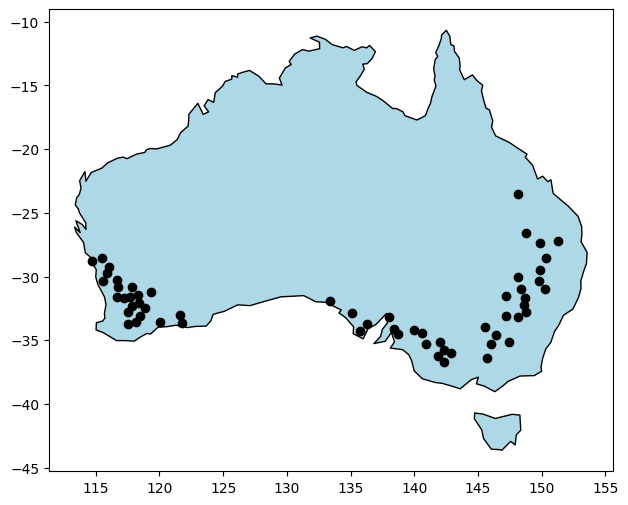

In [9]:
#get built in dataset from geopandas
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_data.head()
#regions = world_data.set_index('name')
#axis = regions.loc['Australia', 'geometry']
axis = world_data[world_data.name == 'Australia'].plot(
#axis = world_data[world_data.continent == 'Africa'].plot(
color = 'lightblue', edgecolor = 'black')
#plt.add_feature(state_feature, facecolor = "r")
df_geo.plot(ax = axis, color = 'black')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(9,6)

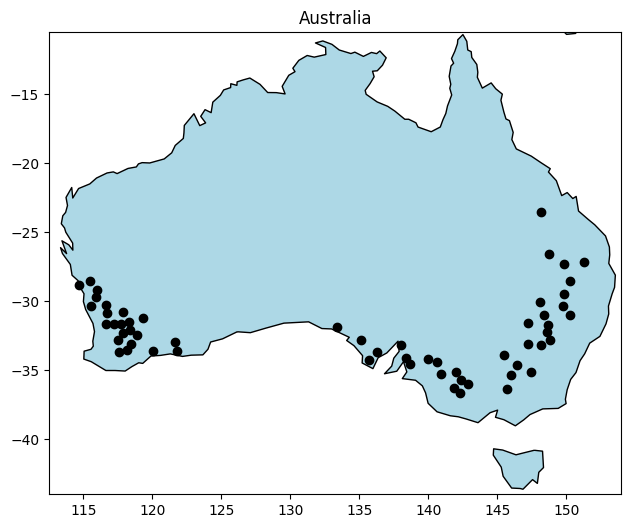

In [10]:
#plot australia map: another way
axis = world_data[world_data.continent == 'Oceania'].plot(
#axis = world_data[world_data.continent == 'Africa'].plot(
color = 'lightblue', edgecolor = 'black')

#plt.add_feature(state_feature, facecolor = "r")
df_geo.plot(ax = axis, color = 'black')
plt.title('Australia')
#plt.title('WA Countries')
plt.xlim([112.5, 154])
plt.ylim([-44, -10.5])

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(9,6)
fig.savefig('australia.tiff', dpi = 200)
#fig.savefig('africa.tiff', dpi = 200)
plt.show()

## Drought monitor data

In [10]:
# Access the drought monitor data
CDI_file = 'cdi_1.nc'                     # Use this file for now but need to use the path to stratum 0 later
cdi_1 = netCDF4.Dataset(CDI_file)
lats = cdi_1.variables['latitude']
lons = cdi_1.variables['longitude']
times = cdi_1.variables['time'] 
dates = num2date(times[:], times.units)

In [11]:
# Extract CDI time series for all the sites
df_cdi = pd.DataFrame({})         # Create an empty DataFrame
df_cdi['Time'] = [date.strftime('%Y-%m-%d') for date in dates[:]]     # Time as the first column
lat_ind = []
lon_ind = []
for i in np.arange(0,59,1):
    #print('Site = %s: Lat = %s, Lon = %s' % (df_station.Sites[i], df_station.Latitude[i], df_station.Longitude[i]))
    latpt, lonpt = df_station.Latitude[i], df_station.Longitude[i]
    # Finding the latitude index
    lat_dist = (lats[:] - latpt)**2
    lat_index = np.argmin(lat_dist)
    lat_ind.append(lat_index)
    # Finding the longitude index
    lon_dist = (lons[:] - lonpt)**2
    lon_index = np.argmin(lon_dist)
    lon_ind.append(lon_index)
    cdis = cdi_1.variables['cdi'][lat_index, lon_index, :]
    # Checking if CDI of a site is a NaN series such as what happens at PortPirie
    if math.isnan(cdis[1]):
        cdis = cdi_1.variables['cdi'][lat_index-1, lon_index, :]
    df_cdi[df_station.Sites[i]] = cdis     # Add CDI time series for each site to the DataFrame

/tmp/ipykernel_96/4134331136.py:19: UserWarning: Warning: converting a masked element to nan.
  if math.isnan(cdis[1]):


In [12]:
# Adding optimal latitude and longitude index for each site (station) into the DataFrame
lat_ind = pd.Series(lat_ind)
lon_ind = pd.Series(lon_ind)
df_station['Latitude index'] = lat_ind
df_station['Longitude index'] = lon_ind

In [15]:
df_cdi

,Time,Goondiwindi,Meandarra,Dalby,Roma,Emerald,Condobolin,Wellington,Dubbo,Gilgandra,...,Merredin,SouthernCross,WonganHills,Bencubbin,Badgingarra,Dalwallinu,Carnamah,Morawa,Geraldton,Mullewa
0,1998-04-01,0.301925,0.309900,0.345693,0.640622,0.468683,0.420966,0.478398,0.369764,0.293258,...,0.736372,0.561680,0.613946,0.637904,0.476373,0.431272,0.239801,0.228259,0.260278,0.273017
1,1998-05-01,0.917675,0.662066,0.874258,0.924583,0.826011,0.887304,0.830473,0.868504,0.875726,...,0.634280,0.637388,0.553087,0.696708,0.532599,0.565655,0.635402,0.679620,0.448901,0.671611
2,1998-06-01,0.952555,0.635571,0.929779,0.818692,0.616037,0.861352,0.962079,0.924816,0.943509,...,0.802620,0.847541,0.680607,0.827109,0.723024,0.726848,0.698036,0.872869,0.706224,0.872092
3,1998-07-01,0.996052,0.881935,0.970540,0.900623,0.755768,0.967959,0.984272,0.982934,0.992772,...,0.894070,0.878851,0.769321,0.875432,0.640792,0.835946,0.867983,0.963734,0.721987,0.951674
4,1998-08-01,0.996168,0.978986,0.956109,0.967872,0.923649,0.985006,0.983855,0.995634,0.991090,...,0.726258,0.731697,0.655244,0.785115,0.591941,0.736656,0.636446,0.851942,0.497462,0.743224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,2022-01-01,0.719939,0.864066,0.729982,0.710492,0.406876,0.909083,0.936736,0.898952,0.965094,...,0.095965,0.061573,0.049025,0.145219,0.005900,0.334274,0.081656,0.061319,0.017374,0.021935
280,2022-02-01,0.628971,0.727422,0.642530,0.465089,0.180803,0.878922,0.723796,0.870279,0.706768,...,0.489767,0.116786,0.548262,0.442400,0.173458,0.308149,0.370335,0.457486,0.016544,0.233600
281,2022-03-01,0.742863,0.844115,0.835515,0.370511,0.048854,0.576360,0.712784,0.826967,0.847868,...,0.757978,0.500995,0.821887,0.797812,0.629872,0.662971,0.781638,0.754759,0.541463,0.478187
282,2022-04-01,0.570512,0.802289,0.910658,0.546142,0.478659,0.600947,0.771782,0.782574,0.894501,...,0.895217,0.605805,0.817355,0.898770,0.886972,0.649616,0.737835,0.851086,0.936489,0.727141


In [16]:
df_station

,Sites,Weather Station,Zones,Wheat price ($/t),Regions,Unnamed: 5,Zonal names,Latitude,Longitude,geometry,Latitude index,Longitude index
0,Goondiwindi,41038,2,NaN,1,NaN,NSW NE/QLD SE,-28.55,150.31,POINT (150.31000 -28.55000),309,766
1,Meandarra,42022,2,NaN,1,NaN,NSW NE/QLD SE,-27.33,149.88,POINT (149.88000 -27.33000),333,758
2,Dalby,41023,2,NaN,1,NaN,NSW NE/QLD SE,-27.18,151.26,POINT (151.26000 -27.18000),336,785
3,Roma,43030,3,NaN,1,NaN,NSW NW/QLD SW,-26.57,148.79,POINT (148.79000 -26.57000),349,736
4,Emerald,35027,1,NaN,1,NaN,QLD Central,-23.53,148.16,POINT (148.16000 -23.53000),409,723
5,Condobolin,50052,5,NaN,1,NaN,NSW Central,-33.07,147.23,POINT (147.23000 -33.07000),219,705
6,Wellington,65028,4,NaN,1,NaN,NSW Vic Slopes,-32.80,148.80,POINT (148.80000 -32.80000),224,736
7,Dubbo,65012,2,NaN,1,NaN,NSW NE/QLD SE,-32.24,148.61,POINT (148.61000 -32.24000),235,732
8,Gilgandra,51018,2,NaN,1,NaN,NSW NE/QLD SE,-31.71,148.66,POINT (148.66000 -31.71000),246,733
9,Nyngan,51039,5,NaN,1,NaN,NSW Central,-31.55,147.20,POINT (147.20000 -31.55000),249,704


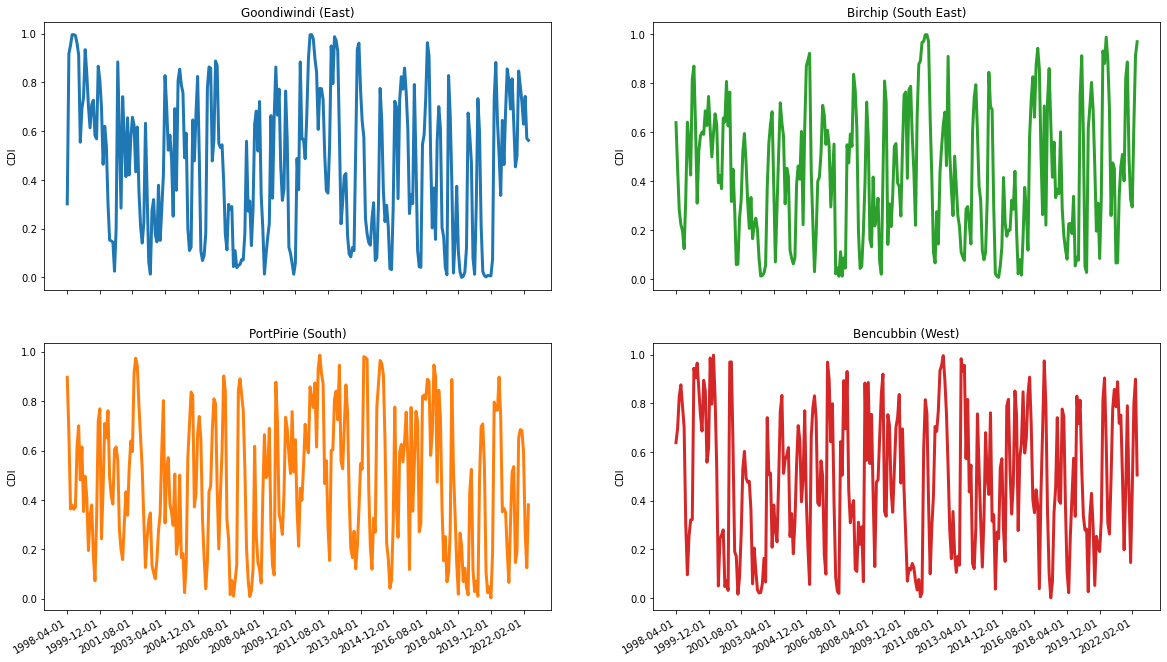

In [17]:
# Plotting full CDI time series
fig, axs = plt.subplots(2,2)
axs[0,0].plot(df_cdi.Goondiwindi, linewidth=3)
axs[0,0].set_title('Goondiwindi (East)')
axs[0,0].set_ylabel('CDI')
axs[0,0].set_xticks(np.arange(0, 283, 20))
##
axs[0,1].plot(df_cdi.Birchip, 'tab:green', linewidth=3)
axs[0,1].set_title('Birchip (South East)')
axs[0,1].set_ylabel('CDI')
axs[0,1].set_xticks(np.arange(0, 283, 20))
##
axs[1,0].plot(df_cdi.PortPirie, 'tab:orange', linewidth=3)
axs[1,0].set_title('PortPirie (South)')
axs[1,0].set_ylabel('CDI')
axs[1,0].set_xticks(np.arange(0, 283, 20), df_cdi.Time[np.arange(0, 283, 20)])
##
axs[1,1].plot(df_cdi.Bencubbin, 'tab:red', linewidth=3)
axs[1,1].set_title('Bencubbin (West)')
axs[1,1].set_ylabel('CDI')
axs[1,1].set_xticks(np.arange(0, 283, 20), df_cdi.Time[np.arange(0, 283, 20)])
fig.set_size_inches(20,12)
fig.autofmt_xdate()

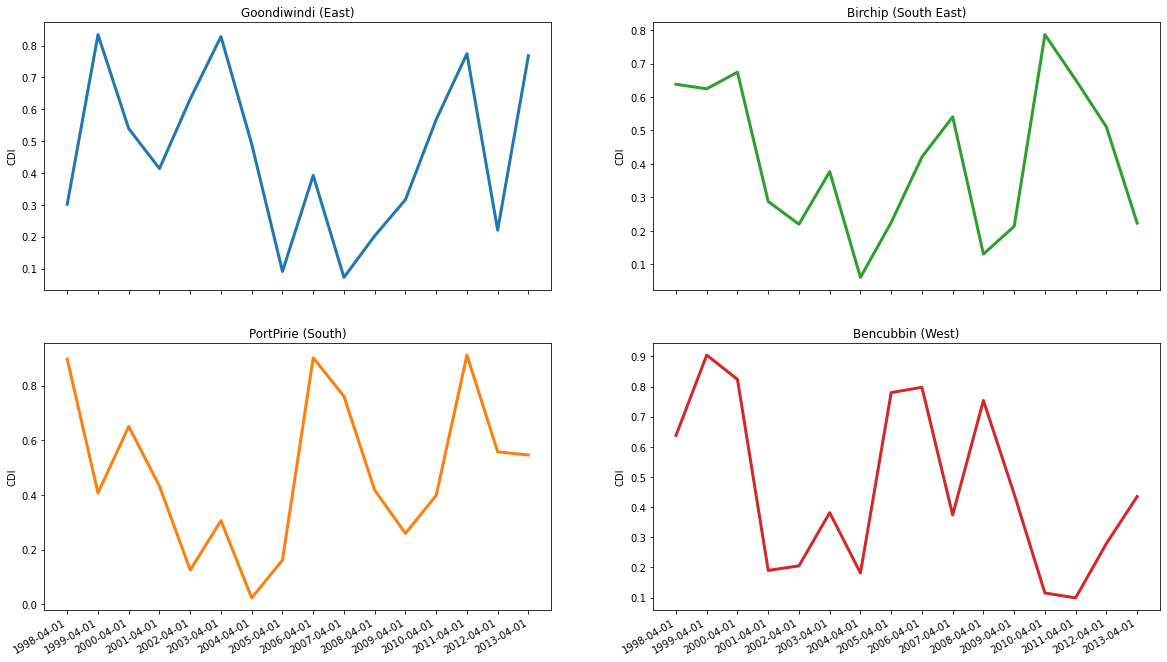

In [18]:
# Index for monthly CDI time series
apr_ind = np.arange(0, 15*12+1, 12)       # index array for April
may_ind = np.arange(1, 15*12+2, 12)       # index array for May
jun_ind = np.arange(2, 15*12+3, 12)       # index array for June
jul_ind = np.arange(3, 15*12+4, 12)       # index array for July
aug_ind = np.arange(4, 15*12+5, 12)       # index array for August
sep_ind = np.arange(5, 15*12+6, 12)       # index array for September

# Plotting CDI time series for April
fig, axs = plt.subplots(2,2)
axs[0,0].plot(df_cdi.Goondiwindi[apr_ind], linewidth=3)
axs[0,0].set_title('Goondiwindi (East)')
axs[0,0].set_ylabel('CDI')
axs[0,0].set_xticks(apr_ind)
##
axs[0,1].plot(df_cdi.Birchip[apr_ind], 'tab:green', linewidth=3)
axs[0,1].set_title('Birchip (South East)')
axs[0,1].set_ylabel('CDI')
axs[0,1].set_xticks(apr_ind)
##
axs[1,0].plot(df_cdi.PortPirie[apr_ind], 'tab:orange', linewidth=3)
axs[1,0].set_title('PortPirie (South)')
axs[1,0].set_ylabel('CDI')
axs[1,0].set_xticks(apr_ind, df_cdi.Time[apr_ind])
##
axs[1,1].plot(df_cdi.Bencubbin[apr_ind], 'tab:red', linewidth=3)
axs[1,1].set_title('Bencubbin (West)')
axs[1,1].set_ylabel('CDI')
axs[1,1].set_xticks(apr_ind, df_cdi.Time[apr_ind])
fig.set_size_inches(20,12)
fig.autofmt_xdate()

## Wheat yield data

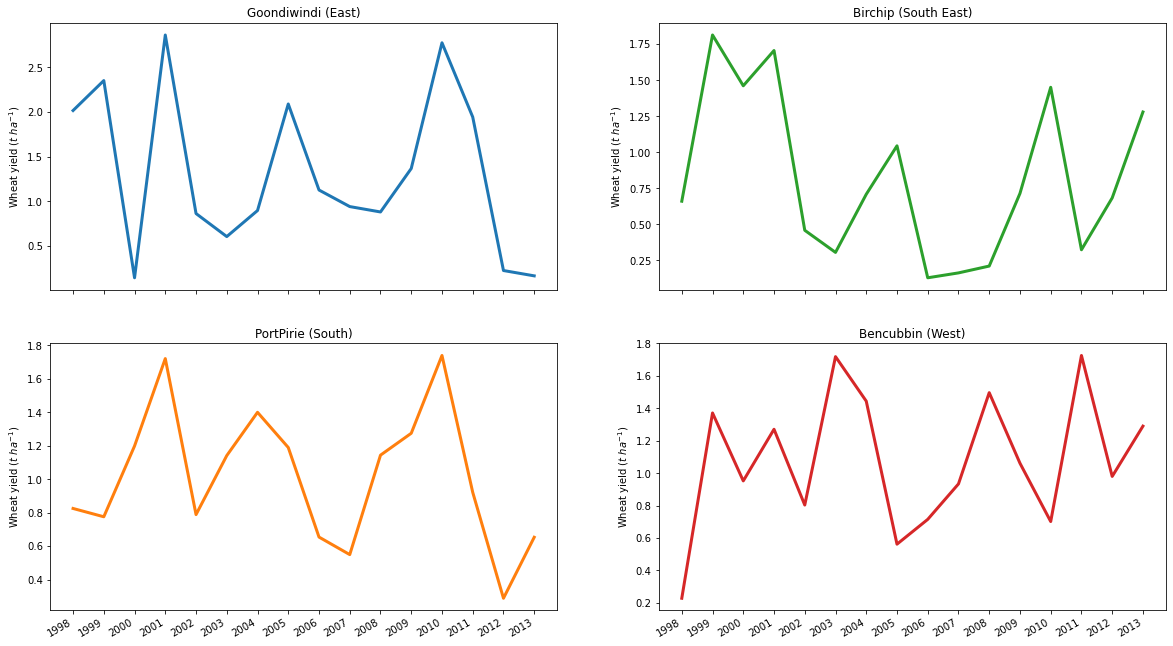

In [19]:
# Plotting wheat yield time series
fig, axs = plt.subplots(2,2)
axs[0,0].plot(df_yield.Goondiwindi, linewidth=3)
axs[0,0].set_title('Goondiwindi (East)')
axs[0,0].set_ylabel('Wheat yield ($t$ $ha^{-1}$)')
axs[0,0].set_xticks(np.arange(0,16,1), df_yield.Year[:])
##
axs[0,1].plot(df_yield.Birchip, 'tab:green', linewidth=3)
axs[0,1].set_title('Birchip (South East)')
axs[0,1].set_ylabel('Wheat yield ($t$ $ha^{-1}$)')
axs[0,1].set_xticks(np.arange(0,16,1), df_yield.Year[:])
##
axs[1,0].plot(df_yield.PortPirie, 'tab:orange', linewidth=3)
axs[1,0].set_title('PortPirie (South)')
axs[1,0].set_ylabel('Wheat yield ($t$ $ha^{-1}$)')
axs[1,0].set_xticks(np.arange(0,16,1), df_yield.Year[:])
##
axs[1,1].plot(df_yield.Bencubbin, 'tab:red', linewidth=3)
axs[1,1].set_title('Bencubbin (West)')
axs[1,1].set_ylabel('Wheat yield ($t$ $ha^{-1}$)')
axs[1,1].set_xticks(np.arange(0,16,1), df_yield.Year[:])
fig.set_size_inches(20,12)
fig.autofmt_xdate()

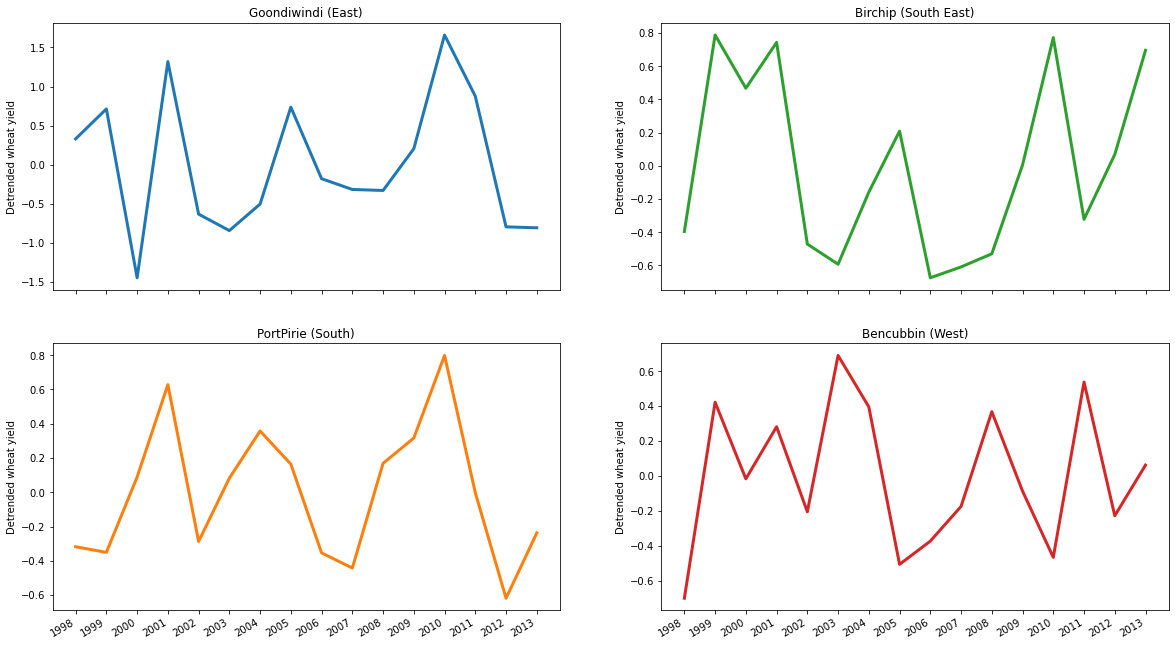

In [20]:
# Detrend the yield time series
y1_detrended = signal.detrend(df_yield.Goondiwindi)
y2_detrended = signal.detrend(df_yield.Birchip)
y3_detrended = signal.detrend(df_yield.PortPirie)
y4_detrended = signal.detrend(df_yield.Bencubbin)
##
fig, axs = plt.subplots(2,2)
axs[0,0].plot(y1_detrended, linewidth=3)
axs[0,0].set_title('Goondiwindi (East)')
axs[0,0].set_ylabel('Detrended wheat yield')
axs[0,0].set_xticks(np.arange(0,16,1), df_yield.Year[:])
##
axs[0,1].plot(y2_detrended, 'tab:green', linewidth=3)
axs[0,1].set_title('Birchip (South East)')
axs[0,1].set_ylabel('Detrended wheat yield')
axs[0,1].set_xticks(np.arange(0,16,1), df_yield.Year[:])
##
axs[1,0].plot(y3_detrended, 'tab:orange', linewidth=3)
axs[1,0].set_title('PortPirie (South)')
axs[1,0].set_ylabel('Detrended wheat yield')
axs[1,0].set_xticks(np.arange(0,16,1), df_yield.Year[:])
##
axs[1,1].plot(y4_detrended, 'tab:red', linewidth=3)
axs[1,1].set_title('Bencubbin (West)')
axs[1,1].set_ylabel('Detrended wheat yield')
axs[1,1].set_xticks(np.arange(0,16,1), df_yield.Year[:])
fig.set_size_inches(20,12)
fig.autofmt_xdate()

In [21]:
# Detrended wheat yield DataFrame
y_matrix = df_yield.loc[:, 'Goondiwindi':]                # Form a matrix of wheat yields as a DataFrame
y_detrended = signal.detrend(y_matrix, axis = 0)          # Set "axis = 0" to detrend in the vertical direction, return a 2-D array
y_matrix_detrended = y_matrix                             # 2-D array of detrended wheat yield becomes a DataFrame 
y_matrix_detrended.loc[:, 'Goondiwindi':] = y_detrended   # Assign detrended wheat yields to the DataFrame

## Correlation between wheat yield anomalies and monthly CDIs

In [22]:
# Monthly CDI DataFrame for all sites from April to August 
cdi_apr = df_cdi.loc[apr_ind, 'Goondiwindi':]             # April CDIs at sites as a DataFrame
cdi_may = df_cdi.loc[may_ind, 'Goondiwindi':]             # May CDIs at sites as a DataFrame
cdi_jun = df_cdi.loc[jun_ind, 'Goondiwindi':]             # June CDIs at sites as a DataFrame
cdi_jul = df_cdi.loc[jul_ind, 'Goondiwindi':]             # July CDIs at sites as a DataFrame
cdi_aug = df_cdi.loc[aug_ind, 'Goondiwindi':]             # August CDIs at sites as a DataFrame
cdi_sep = df_cdi.loc[sep_ind, 'Goondiwindi':]             # September CDIs at sites as a DataFrame

In [23]:
# Estimating the correlation between wheat yield anomalies and monthly CDIs
rhos_apr = []
rhos_may = []
rhos_jun = []
rhos_jul = []
rhos_aug = []
rhos_sep = []
for i in np.arange(0,59,1):
    # April CDI
    rho_apr = np.corrcoef(cdi_apr[df_station.Sites[i]], y_matrix_detrended[df_station.Sites[i]])
    rho_v_apr = rho_apr[0,1]
    rhos_apr.append(rho_v_apr)
    # May CDI
    rho_may = np.corrcoef(cdi_may[df_station.Sites[i]], y_matrix_detrended[df_station.Sites[i]])
    rho_v_may = rho_may[0,1]
    rhos_may.append(rho_v_may)
    # June CDI
    rho_jun = np.corrcoef(cdi_jun[df_station.Sites[i]], y_matrix_detrended[df_station.Sites[i]])
    rho_v_jun = rho_jun[0,1]
    rhos_jun.append(rho_v_jun)
    # July CDI
    rho_jul = np.corrcoef(cdi_jul[df_station.Sites[i]], y_matrix_detrended[df_station.Sites[i]])
    rho_v_jul = rho_jul[0,1]
    rhos_jul.append(rho_v_jul)
    # August CDI
    rho_aug = np.corrcoef(cdi_aug[df_station.Sites[i]], y_matrix_detrended[df_station.Sites[i]])
    rho_v_aug = rho_aug[0,1]
    rhos_aug.append(rho_v_aug)
    # September CDI
    rho_sep = np.corrcoef(cdi_sep[df_station.Sites[i]], y_matrix_detrended[df_station.Sites[i]])
    rho_v_sep = rho_sep[0,1]
    rhos_sep.append(rho_v_sep)

In [24]:
# Adding correlation coefficients to the DataFrame 
# April
rhos_apr = pd.Series(rhos_apr)
df_station['April CDI'] = rhos_apr
# May
rhos_may = pd.Series(rhos_may)
df_station['May CDI'] = rhos_may
# June
rhos_jun = pd.Series(rhos_jun)
df_station['June CDI'] = rhos_jun
# July
rhos_jul = pd.Series(rhos_jul)
df_station['July CDI'] = rhos_jul
# August
rhos_aug = pd.Series(rhos_aug)
df_station['August CDI'] = rhos_aug
# September
rhos_sep = pd.Series(rhos_sep)
df_station['September CDI'] = rhos_sep
#del df_station['Correlation: April CDI']
df_station

,Sites,Weather Station,Zones,Wheat price ($/t),Regions,Unnamed: 5,Zonal names,Latitude,Longitude,geometry,Latitude index,Longitude index,April CDI,May CDI,June CDI,July CDI,August CDI,September CDI
0,Goondiwindi,41038,2,NaN,1,NaN,NSW NE/QLD SE,-28.55,150.31,POINT (150.31000 -28.55000),309,766,-0.024304,0.313705,0.419359,0.608206,0.708496,0.689422
1,Meandarra,42022,2,NaN,1,NaN,NSW NE/QLD SE,-27.33,149.88,POINT (149.88000 -27.33000),333,758,0.194925,0.406361,0.144262,0.342795,0.620980,0.740720
2,Dalby,41023,2,NaN,1,NaN,NSW NE/QLD SE,-27.18,151.26,POINT (151.26000 -27.18000),336,785,0.275711,0.479662,0.101191,0.225990,0.507936,0.852961
3,Roma,43030,3,NaN,1,NaN,NSW NW/QLD SW,-26.57,148.79,POINT (148.79000 -26.57000),349,736,0.277695,0.274970,-0.050351,0.258055,0.548460,0.865495
4,Emerald,35027,1,NaN,1,NaN,QLD Central,-23.53,148.16,POINT (148.16000 -23.53000),409,723,0.073342,0.078421,0.373705,0.651691,0.708555,0.835837
5,Condobolin,50052,5,NaN,1,NaN,NSW Central,-33.07,147.23,POINT (147.23000 -33.07000),219,705,-0.103640,0.276634,0.499801,0.681743,0.651571,0.619869
6,Wellington,65028,4,NaN,1,NaN,NSW Vic Slopes,-32.80,148.80,POINT (148.80000 -32.80000),224,736,-0.073480,0.157901,0.156936,0.267708,0.226576,0.322750
7,Dubbo,65012,2,NaN,1,NaN,NSW NE/QLD SE,-32.24,148.61,POINT (148.61000 -32.24000),235,732,0.019421,0.353241,0.292298,0.457338,0.557478,0.667717
8,Gilgandra,51018,2,NaN,1,NaN,NSW NE/QLD SE,-31.71,148.66,POINT (148.66000 -31.71000),246,733,0.000063,0.178419,0.017363,0.201849,0.303571,0.459692
9,Nyngan,51039,5,NaN,1,NaN,NSW Central,-31.55,147.20,POINT (147.20000 -31.55000),249,704,-0.186358,-0.051420,-0.091732,0.189958,0.509564,0.755244


## Mapping the correlation data

In [25]:
#f = px.choropleth(df,
#                  locationmode = 'country names',
#                  locations = df['country'],
#                  scope = 'africa',
#                  color = df['country'])
#f.show()
#world_data.head()
world = world_data[(world_data.pop_est>0) & (world_data.name!="Antarctica")]
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
#world.boundary.plot()
#world
cities

,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)
...,...,...
197,Cairo,POINT (31.24802 30.05191)
198,Tokyo,POINT (139.74946 35.68696)
199,Paris,POINT (2.33139 48.86864)
200,Santiago,POINT (-70.66899 -33.44807)


/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1472: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


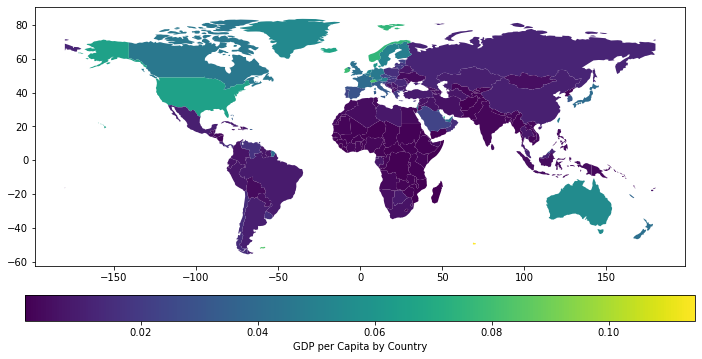

In [26]:
gdp_per_cap = world.gdp_md_est / world.pop_est
world['gdp_per_cap'] = gdp_per_cap

fig, ax = plt.subplots(1, 1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size = "10%", pad=0.4)
world.plot(column = 'gdp_per_cap', 
           ax = ax, 
           legend = True,
           cax=cax,
           legend_kwds={'label': "GDP per Capita by Country", 'orientation': "horizontal"})
fig.set_size_inches(12,9)

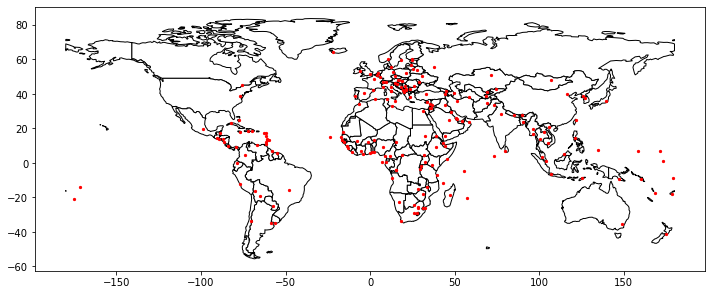

In [27]:
# Maps with Layers
cities = cities.to_crs(world.crs)
fig, axs = plt.subplots()
world.plot(ax = axs, color='white', edgecolor='black')
cities.plot(ax = axs, marker='o', color='red', markersize=5)
fig.set_size_inches(12,9)

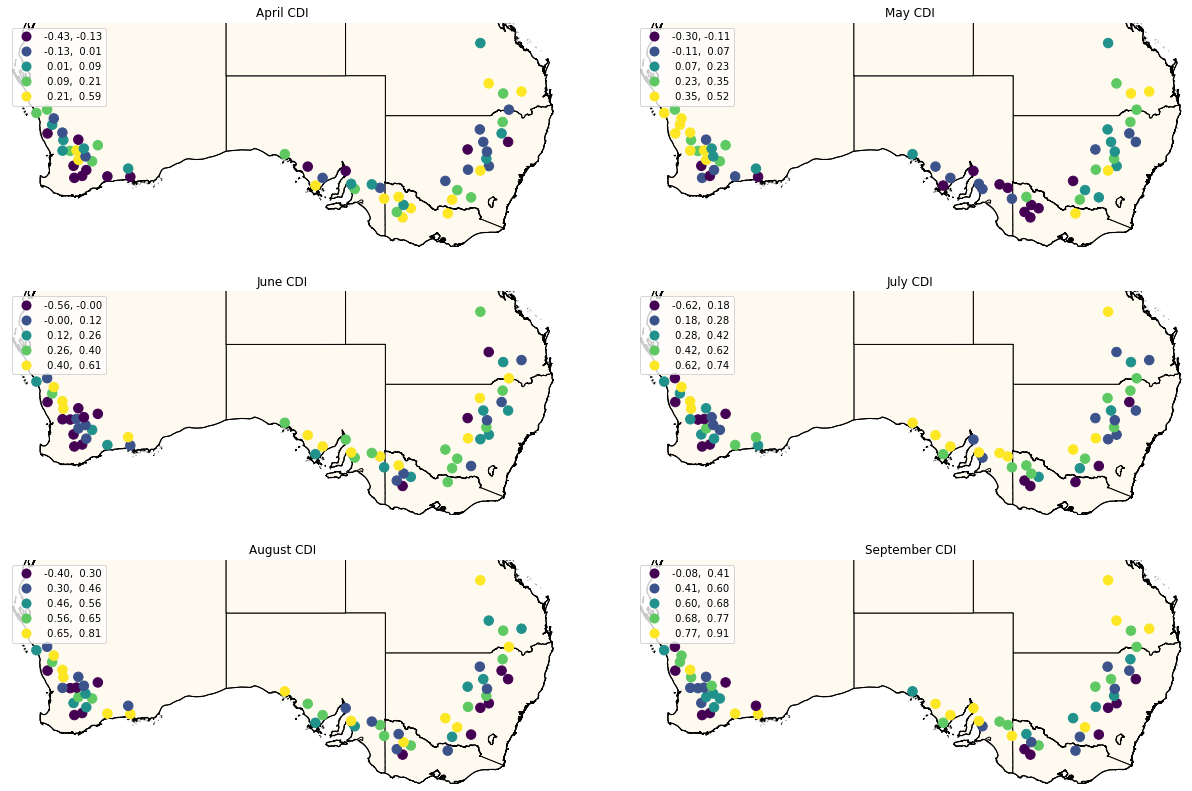

In [28]:
fig, axs = plt.subplots(3,2, subplot_kw=dict(projection=ccrs.PlateCarree()))
# April CDI
axs[0,0].set_extent([112.5, 154, -37, -22])
axs[0,0].coastlines(color='black', linewidth=1, resolution='50m')
axs[0,0].set_title('April CDI')
axs[0,0].set_axis_off()
axs[0,0].add_feature(state_feature, 
                     facecolor="floralwhite", 
                     zorder=1)
#df_geo.plot(ax = ax, color = 'b')
df_geo.plot(column = 'April CDI', 
            ax = axs[0,0], 
            markersize=90, 
            legend=True, 
            scheme = "quantiles",
            cmap = 'viridis',
            zorder=2)
#
# May CDI
axs[0,1].set_extent([112.5, 154, -37, -22])
axs[0,1].coastlines(color='black', linewidth=1, resolution='50m')
axs[0,1].set_title('May CDI')
axs[0,1].set_axis_off()
axs[0,1].add_feature(state_feature, 
                     facecolor="floralwhite", 
                     zorder=1)
df_geo.plot(column = 'May CDI', 
            ax = axs[0,1], 
            markersize=90, 
            legend=True, 
            scheme = "quantiles", 
            cmap = 'viridis',
            zorder=2)
#
# June CDI
axs[1,0].set_extent([112.5, 154, -37, -22])
axs[1,0].coastlines(color='black', linewidth=1, resolution='50m')
axs[1,0].set_title('June CDI')
axs[1,0].set_axis_off()
axs[1,0].add_feature(state_feature, 
                     facecolor="floralwhite", 
                     zorder=1)
df_geo.plot(column = 'June CDI', 
            ax = axs[1,0], 
            markersize=90, 
            legend=True, 
            scheme = "quantiles", 
            cmap = 'viridis',
            zorder=2)
#
# July CDI
axs[1,1].set_extent([112.5, 154, -37, -22])
axs[1,1].coastlines(color='black', linewidth=1, resolution='50m')
axs[1,1].set_title('July CDI')
axs[1,1].set_axis_off()
axs[1,1].add_feature(state_feature, 
                     facecolor="floralwhite", 
                     zorder=1)
df_geo.plot(column = 'July CDI', 
            ax = axs[1,1], 
            markersize=90, 
            legend=True, 
            scheme = "quantiles",
            cmap = 'viridis',
            zorder=2)
#
# August CDI
axs[2,0].set_extent([112.5, 154, -37, -22])
axs[2,0].coastlines(color='black', linewidth=1, resolution='50m')
axs[2,0].set_title('August CDI')
axs[2,0].set_axis_off()
axs[2,0].add_feature(state_feature, 
                     facecolor="floralwhite", 
                     zorder=1)
df_geo.plot(column = 'August CDI', 
            ax = axs[2,0], 
            markersize=90, 
            legend=True, 
            scheme = "quantiles",
            cmap = 'viridis',
            zorder=2)
#
# September CDI
axs[2,1].set_extent([112.5, 154, -37, -22])
axs[2,1].coastlines(color='black', linewidth=1, resolution='50m')
axs[2,1].set_title('September CDI')
axs[2,1].set_axis_off()
axs[2,1].add_feature(state_feature, 
                     facecolor="floralwhite", 
                     zorder=1)
df_geo.plot(column = 'September CDI', 
            ax = axs[2,1], 
            markersize=90, 
            legend=True, 
            scheme = "quantiles", 
            cmap = 'viridis',
            zorder=2)
fig.set_size_inches(30,14)
#fig.tight_layout()
fig.subplots_adjust(wspace=-0.4)
#plt.show()
fig.savefig('wheatbelt1.tiff', dpi = 200)

## Consistent mapping

In [29]:
#Deciles classification
cor_val = [df_station['April CDI'][:], 
           df_station['May CDI'][:],
           df_station['June CDI'][:],
           df_station['July CDI'][:],
           df_station['August CDI'][:],
           df_station['September CDI'][:]]
q10 = mc.Quantiles(cor_val, k=10)
df_geo['Apr_Class'] = q10.yb[0:59]
df_geo['May_Class'] = q10.yb[59:2*59]
df_geo['Jun_Class'] = q10.yb[2*59:3*59]
df_geo['Jul_Class'] = q10.yb[3*59:4*59]
df_geo['Aug_Class'] = q10.yb[4*59:5*59]
df_geo['Sep_Class'] = q10.yb[5*59:6*59]

In [30]:
df_geo

,Sites,Weather Station,Zones,Wheat price ($/t),Regions,Unnamed: 5,Zonal names,Latitude,Longitude,geometry,...,June CDI,July CDI,August CDI,September CDI,Apr_Class,May_Class,Jun_Class,Jul_Class,Aug_Class,Sep_Class
0,Goondiwindi,41038,2,NaN,1,NaN,NSW NE/QLD SE,-28.55,150.31,POINT (150.31000 -28.55000),...,0.419359,0.608206,0.708496,0.689422,1,5,6,8,9,9
1,Meandarra,42022,2,NaN,1,NaN,NSW NE/QLD SE,-27.33,149.88,POINT (149.88000 -27.33000),...,0.144262,0.342795,0.620980,0.740720,3,6,3,5,8,9
2,Dalby,41023,2,NaN,1,NaN,NSW NE/QLD SE,-27.18,151.26,POINT (151.26000 -27.18000),...,0.101191,0.225990,0.507936,0.852961,4,7,2,4,7,9
3,Roma,43030,3,NaN,1,NaN,NSW NW/QLD SW,-26.57,148.79,POINT (148.79000 -26.57000),...,-0.050351,0.258055,0.548460,0.865495,4,4,1,4,7,9
4,Emerald,35027,1,NaN,1,NaN,QLD Central,-23.53,148.16,POINT (148.16000 -23.53000),...,0.373705,0.651691,0.708555,0.835837,2,2,5,8,9,9
5,Condobolin,50052,5,NaN,1,NaN,NSW Central,-33.07,147.23,POINT (147.23000 -33.07000),...,0.499801,0.681743,0.651571,0.619869,1,4,7,8,8,8
6,Wellington,65028,4,NaN,1,NaN,NSW Vic Slopes,-32.80,148.80,POINT (148.80000 -32.80000),...,0.156936,0.267708,0.226576,0.322750,1,3,3,4,4,5
7,Dubbo,65012,2,NaN,1,NaN,NSW NE/QLD SE,-32.24,148.61,POINT (148.61000 -32.24000),...,0.292298,0.457338,0.557478,0.667717,1,5,4,6,7,8
8,Gilgandra,51018,2,NaN,1,NaN,NSW NE/QLD SE,-31.71,148.66,POINT (148.66000 -31.71000),...,0.017363,0.201849,0.303571,0.459692,1,3,1,3,5,6
9,Nyngan,51039,5,NaN,1,NaN,NSW Central,-31.55,147.20,POINT (147.20000 -31.55000),...,-0.091732,0.189958,0.509564,0.755244,0,1,1,3,7,9


In [31]:
#Custimise the legend by creating a function
def replace_legend_items(legend, mapping):
    for txt in legend.texts:
        for k,v in mapping.items():
            if txt.get_text() == str(k):
                txt.set_text(v)
                
# Mapping the legend classes
mapping = dict([(i,s) for i,s in enumerate(q10.get_legend_classes())])

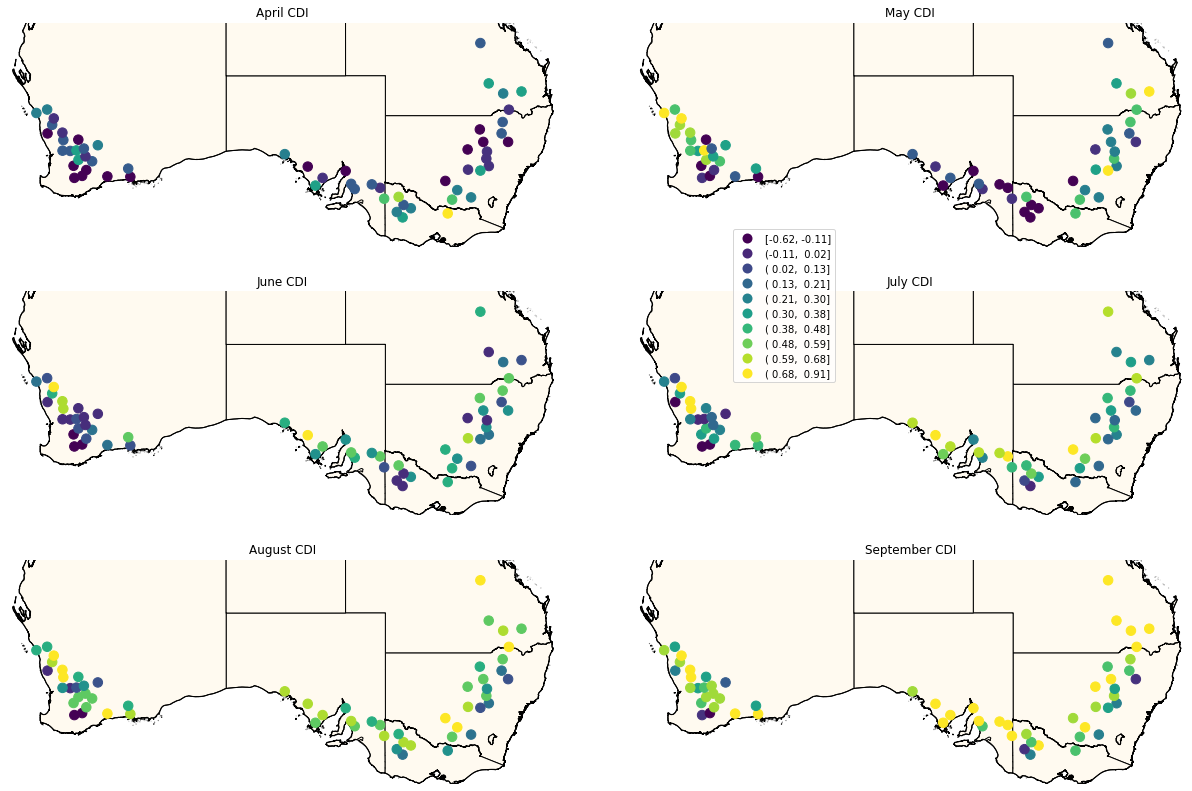

In [32]:
fig, axs = plt.subplots(3,2, subplot_kw=dict(projection=ccrs.PlateCarree()))
# April CDI
axs[0,0].set_extent([112.5, 154, -37, -22])
axs[0,0].coastlines(color='black', linewidth=1, resolution='50m')
axs[0,0].set_title('April CDI')
axs[0,0].set_axis_off()
axs[0,0].add_feature(state_feature, 
                     facecolor="floralwhite", 
                     zorder=1)
df_geo.plot(column = 'Apr_Class', 
            categorical=True,
            k=10,
            cmap = 'viridis',
            ax = axs[0,0],
            markersize=90, 
#            legend=True, 
            zorder=2)
#
# May CDI
axs[0,1].set_extent([112.5, 154, -37, -22])
axs[0,1].coastlines(color='black', linewidth=1, resolution='50m')
axs[0,1].set_title('May CDI')
axs[0,1].set_axis_off()
axs[0,1].add_feature(state_feature, 
                     facecolor="floralwhite", 
                     zorder=1)
df_geo.plot(column = 'May_Class', 
            categorical=True,
            k=10,
            cmap = 'viridis',
            ax = axs[0,1],
            markersize=90, 
#            legend=True, 
            zorder=2)
#
# June CDI
axs[1,0].set_extent([112.5, 154, -37, -22])
axs[1,0].coastlines(color='black', linewidth=1, resolution='50m')
axs[1,0].set_title('June CDI')
axs[1,0].set_axis_off()
axs[1,0].add_feature(state_feature, 
                     facecolor="floralwhite", 
                     zorder=1)
df_geo.plot(column = 'Jun_Class', 
            categorical=True,
            k=10,
            cmap = 'viridis',
            ax = axs[1,0],
            markersize=90, 
#            legend=True, 
            zorder=2)
#
# July CDI
axs[1,1].set_extent([112.5, 154, -37, -22])
axs[1,1].coastlines(color='black', linewidth=1, resolution='50m')
axs[1,1].set_title('July CDI')
axs[1,1].set_axis_off()
axs[1,1].add_feature(state_feature, 
                     facecolor="floralwhite", 
                     zorder=1)
df_geo.plot(column = 'Jul_Class', 
            categorical=True,
            k=10,
            cmap = 'viridis',
            ax = axs[1,1],
            markersize=90, 
            legend=True,
            legend_kwds={'loc': 'upper center'},
            zorder=2)
replace_legend_items(axs[1,1].get_legend(),mapping)
leg = axs[1,1].get_legend()
leg.set_bbox_to_anchor((0.02, 0.5, 0.5, 0.8))
#
# August CDI
axs[2,0].set_extent([112.5, 154, -37, -22])
axs[2,0].coastlines(color='black', linewidth=1, resolution='50m')
axs[2,0].set_title('August CDI')
axs[2,0].set_axis_off()
axs[2,0].add_feature(state_feature, 
                     facecolor="floralwhite", 
                     zorder=1)
df_geo.plot(column = 'Aug_Class', 
            categorical=True,
            k=10,
            cmap = 'viridis',
            ax = axs[2,0],
            markersize=90, 
#            legend=True, 
            zorder=2)
#
# September CDI
axs[2,1].set_extent([112.5, 154, -37, -22])
axs[2,1].coastlines(color='black', linewidth=1, resolution='50m')
axs[2,1].set_title('September CDI')
axs[2,1].set_axis_off()
axs[2,1].add_feature(state_feature, 
                     facecolor="floralwhite", 
                     zorder=1)
df_geo.plot(column = 'Sep_Class', 
            categorical=True,
            k=10,
            cmap = 'viridis',
            ax = axs[2,1],
            markersize=90, 
#            legend=True, 
            zorder=2)
#
fig.set_size_inches(30,14)
fig.subplots_adjust(wspace=-0.4)
fig.savefig('wheatbelt2.tiff', dpi = 200)

## Decision making without and with drought monitor information
It can be seen from equation (5) that the optimal prior choice (the decision without drought monitor information) is linear in the expectation of $S_{i,t}$ ($\mu_{S_{i,t}}$) while the optimal posterior choice (the decision with drought monitor information) is linear in the conditional expectation of $S_{i,t}$ i.e. $\mathtt{E}\left[S_{i,t}|D_{i,t}=d_{i,t}\right]$ (see equation (6)).

### Optimal prior choice $\mu_{S_{i,t}}$

In [33]:
# Add a column of expected observed wheat yields for each site
df_yield_m = df_yield.mean()
df_station['AverageYield']=[df_yield_m[:][i] for i in np.arange(1,60,1)]
#
# Add a column for variances of observed wheat yields for each site
df_yield_v = df_yield.var()
df_station['VarYield']=[df_yield_v[:][i] for i in np.arange(1,60,1)]
df_station.head()

,Sites,Weather Station,Zones,Wheat price ($/t),Regions,Unnamed: 5,Zonal names,Latitude,Longitude,geometry,...,August CDI,September CDI,Apr_Class,May_Class,Jun_Class,Jul_Class,Aug_Class,Sep_Class,AverageYield,VarYield
0,Goondiwindi,41038,2,NaN,1,NaN,NSW NE/QLD SE,-28.55,150.31,POINT (150.31000 -28.55000),...,0.708496,0.689422,1,5,6,8,9,9,1.328169,0.812906
1,Meandarra,42022,2,NaN,1,NaN,NSW NE/QLD SE,-27.33,149.88,POINT (149.88000 -27.33000),...,0.620980,0.740720,3,6,3,5,8,9,0.714592,0.299986
2,Dalby,41023,2,NaN,1,NaN,NSW NE/QLD SE,-27.18,151.26,POINT (151.26000 -27.18000),...,0.507936,0.852961,4,7,2,4,7,9,0.863563,0.374885
3,Roma,43030,3,NaN,1,NaN,NSW NW/QLD SW,-26.57,148.79,POINT (148.79000 -26.57000),...,0.548460,0.865495,4,4,1,4,7,9,0.372651,0.139186
4,Emerald,35027,1,NaN,1,NaN,QLD Central,-23.53,148.16,POINT (148.16000 -23.53000),...,0.708555,0.835837,2,2,5,8,9,9,1.450310,0.129413


### Optimal posterior choice $\mathtt{E}\left[S_{i,t}|D_{i,t}=d_{i,t}\right]$

In [34]:
# Means and variances of CDI for each month from April to September 
cdi_stat = pd.DataFrame({})
cdi_stat['Sites'] = df_station.Sites

# Define a function to estimate mean and variance from a CDI DataFrame
def stat(data):
    data_m = data.mean()
    m = [data_m[:][i] for i in np.arange(0,59,1)]
    data_v = data.var()
    v = [data_v[:][i] for i in np.arange(0,59,1)]
    return m, v
#
# April CDI
apr_m, apr_v = stat(cdi_apr) 
cdi_stat['MeanApr'], cdi_stat['VarApr'] = apr_m, apr_v
#
# May CDI
may_m, may_v = stat(cdi_may) 
cdi_stat['MeanMay'], cdi_stat['VarMay'] = may_m, may_v
#
# June CDI
jun_m, jun_v = stat(cdi_jun) 
cdi_stat['MeanJun'], cdi_stat['VarJun'] = jun_m, jun_v
#
# July CDI
jul_m, jul_v = stat(cdi_jul) 
cdi_stat['MeanJul'], cdi_stat['VarJul'] = jul_m, jul_v
#
# August CDI
aug_m, aug_v = stat(cdi_aug) 
cdi_stat['MeanAug'], cdi_stat['VarAug'] = aug_m, aug_v
#
# September CDI
sep_m, sep_v = stat(cdi_sep) 
cdi_stat['MeanSep'], cdi_stat['VarSep'] = sep_m, sep_v
cdi_stat

,Sites,MeanApr,VarApr,MeanMay,VarMay,MeanJun,VarJun,MeanJul,VarJul,MeanAug,VarAug,MeanSep,VarSep
0,Goondiwindi,0.465317,0.065388,0.460631,0.066966,0.451268,0.070781,0.436644,0.080574,0.425350,0.091523,0.430125,0.095614
1,Meandarra,0.434805,0.067071,0.419115,0.053184,0.460573,0.051966,0.441405,0.070916,0.432796,0.080289,0.405480,0.100793
2,Dalby,0.453911,0.081406,0.386628,0.074926,0.489896,0.088268,0.468469,0.090999,0.477869,0.091707,0.416074,0.097839
3,Roma,0.471266,0.099784,0.454858,0.097793,0.525917,0.064834,0.446433,0.077287,0.481599,0.080690,0.440631,0.102899
4,Emerald,0.458338,0.093362,0.426849,0.100410,0.509587,0.088556,0.470246,0.074867,0.493900,0.084949,0.425957,0.098533
5,Condobolin,0.483287,0.083702,0.406219,0.089939,0.482249,0.076074,0.542341,0.074612,0.477142,0.074719,0.426729,0.095621
6,Wellington,0.508596,0.082088,0.411503,0.091584,0.487083,0.076592,0.507882,0.066347,0.461279,0.071233,0.438084,0.083986
7,Dubbo,0.510429,0.078641,0.442045,0.100565,0.517634,0.080217,0.529800,0.069812,0.488983,0.071711,0.446137,0.081369
8,Gilgandra,0.504169,0.074624,0.440911,0.091732,0.529600,0.076337,0.515089,0.070651,0.480442,0.082112,0.428346,0.097768
9,Nyngan,0.517429,0.082648,0.428296,0.072612,0.512656,0.063758,0.520899,0.065759,0.474084,0.086239,0.428979,0.084409


In [35]:
# Estimating optimal posterior choice for each month at all sites
post_ch = pd.DataFrame({})
post_ch['Sites'] = df_station.Sites
# Latest April CDI
d_apr = [cdi_apr.loc[180][i] for i in np.arange(0,59,1)]
# Since CDI values being close to 0 represent severe drought
del_y_apr = df_station['April CDI']*(cdi_stat.MeanApr - d_apr)*(df_station.VarYield/cdi_stat.VarApr)  # This can also be considered as drought assistance
# April assistance
apr_as = df_station.AverageYield + del_y_apr
post_ch['AprAs'] = apr_as
#
# Latest May CDI
d_may = [cdi_may.loc[181][i] for i in np.arange(0,59,1)]
del_y_may = df_station['May CDI']*(cdi_stat.MeanMay - d_may)*(df_station.VarYield/cdi_stat.VarMay)  
# May assistance
may_as = df_station.AverageYield + del_y_may
post_ch['MayAs'] = may_as
#
# Latest June CDI
d_jun = [cdi_jun.loc[182][i] for i in np.arange(0,59,1)]
del_y_jun = df_station['June CDI']*(cdi_stat.MeanJun - d_jun)*(df_station.VarYield/cdi_stat.VarJun)  
# June assistance
jun_as = df_station.AverageYield + del_y_jun
post_ch['JunAs'] = jun_as
#
# Latest July CDI
d_jul = [cdi_jul.loc[183][i] for i in np.arange(0,59,1)]
del_y_jul = df_station['July CDI']*(cdi_stat.MeanJul - d_jul)*(df_station.VarYield/cdi_stat.VarJul)  
# July assistance
jul_as = df_station.AverageYield + del_y_jul
post_ch['JulAs'] = jul_as
#
# Latest August CDI
d_aug = [cdi_aug.loc[184][i] for i in np.arange(0,59,1)]
del_y_aug = df_station['August CDI']*(cdi_stat.MeanAug - d_aug)*(df_station.VarYield/cdi_stat.VarAug)  
# August assistance
aug_as = df_station.AverageYield + del_y_aug
post_ch['AugAs'] = aug_as
#
# Latest September CDI
d_sep = [cdi_sep.loc[185][i] for i in np.arange(0,59,1)]
del_y_sep = df_station['September CDI']*(cdi_stat.MeanSep - d_sep)*(df_station.VarYield/cdi_stat.VarSep)  
# September assistance
sep_as = df_station.AverageYield + del_y_sep
post_ch['SepAs'] = sep_as

### Mapping drought assistance

In [36]:
# Convert posterior choice DataFrame (post_ch) to geoDataFrame
post_ch['Latitude'] = df_station.Latitude
post_ch['Longitude'] = df_station.Longitude
post_ch_geo = gpd.GeoDataFrame(post_ch, geometry = gpd.points_from_xy(post_ch.Longitude, post_ch.Latitude))
post_ch_geo

,Sites,AprAs,MayAs,JunAs,JulAs,AugAs,SepAs,Latitude,Longitude,geometry
0,Goondiwindi,1.419673,0.645162,0.730375,2.517058,2.873407,3.009927,-28.55,150.31,POINT (150.31000 -28.55000)
1,Meandarra,0.626868,0.767118,0.794302,1.031240,1.438362,1.524020,-27.33,149.88,POINT (149.88000 -27.33000)
2,Dalby,0.438469,0.073580,0.779547,0.676369,0.982919,1.214768,-27.18,151.26,POINT (151.26000 -27.18000)
3,Roma,0.453503,0.394157,0.367832,0.467782,0.805281,0.887054,-26.57,148.79,POINT (148.79000 -26.57000)
4,Emerald,1.427962,1.416774,1.496873,1.592352,1.817667,1.860838,-23.53,148.16,POINT (148.16000 -23.53000)
5,Condobolin,0.720000,0.997114,-0.482711,-0.708808,-0.832421,0.384428,-33.07,147.23,POINT (147.23000 -33.07000)
6,Wellington,1.611045,1.927283,1.541671,1.509817,1.688595,2.339182,-32.80,148.80,POINT (148.80000 -32.80000)
7,Dubbo,1.356414,1.703246,0.899806,0.763572,1.228286,1.893990,-32.24,148.61,POINT (148.61000 -32.24000)
8,Gilgandra,1.255533,1.566847,1.231801,1.028353,1.211972,1.663715,-31.71,148.66,POINT (148.66000 -31.71000)
9,Nyngan,0.931771,1.170738,1.518457,0.746047,0.449213,1.185436,-31.55,147.20,POINT (147.20000 -31.55000)


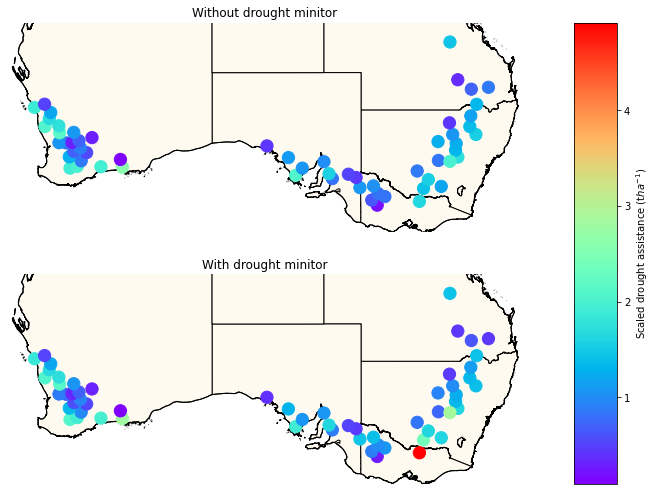

In [37]:
# April drought assistance
all_as = np.array([df_geo.AverageYield, post_ch_geo.AprAs])
min_val, max_val = np.amin(all_as), np.amax(all_as)

fig, axs = plt.subplots(2,1, subplot_kw=dict(projection=ccrs.PlateCarree()))
# Without drought monitor 
axs[0].set_extent([112.5, 154, -37, -22])
axs[0].coastlines(color='black', linewidth=1, resolution='50m')
axs[0].set_title('Without drought minitor')
axs[0].set_axis_off()
axs[0].add_feature(state_feature, 
                     facecolor="floralwhite", 
                     zorder=1)
df_geo.plot(column = 'AverageYield', 
            cmap = 'rainbow',
            vmin = min_val,
            vmax = max_val,
            ax = axs[0],
            markersize=150, 
#            legend=True, 
            zorder=2)
# With drought monitor 
axs[1].set_extent([112.5, 154, -37, -22])
axs[1].coastlines(color='black', linewidth=1, resolution='50m')
axs[1].set_title('With drought minitor')
axs[1].set_axis_off()
axs[1].add_feature(state_feature, 
                     facecolor="floralwhite", 
                     zorder=1)
cax = plt.axes([0.82, 0.1, 0.05, 0.8])
post_ch_geo.plot(column = 'AprAs', 
            cmap = 'rainbow',
            vmin = min_val,
            vmax = max_val,
            ax = axs[1],
            cax = cax,
            markersize=150, 
            legend=True,
            legend_kwds={'label': "Scaled drought assistance (t$ha^{-1}$)", 'orientation': "vertical"},
            zorder=2)
fig.set_size_inches(12,8)
fig.subplots_adjust(bottom = 0.1, right = 0.8, top = 0.9)
#fig.savefig('wheatbelt2.tiff', dpi = 200)

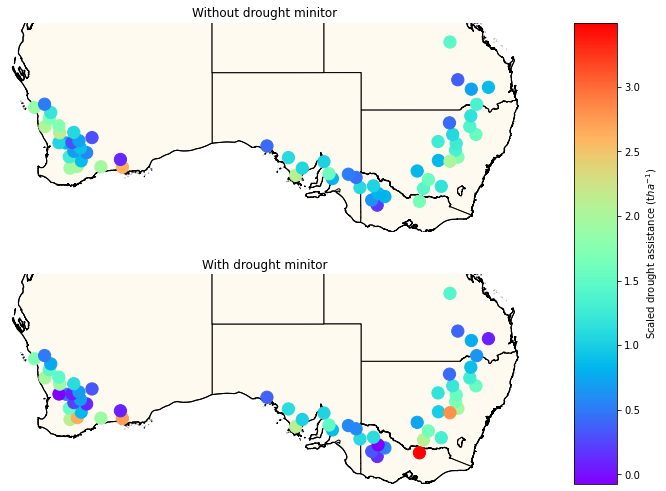

In [38]:
# May drought assistance 
all_as = np.array([df_geo.AverageYield, post_ch_geo.MayAs])
min_val, max_val = np.amin(all_as), np.amax(all_as)

fig, axs = plt.subplots(2,1, subplot_kw=dict(projection=ccrs.PlateCarree()))
# Without drought monitor 
axs[0].set_extent([112.5, 154, -37, -22])
axs[0].coastlines(color='black', linewidth=1, resolution='50m')
axs[0].set_title('Without drought minitor')
axs[0].set_axis_off()
axs[0].add_feature(state_feature, 
                     facecolor="floralwhite", 
                     zorder=1)
df_geo.plot(column = 'AverageYield', 
            cmap = 'rainbow',
            vmin = min_val,
            vmax = max_val,
            ax = axs[0],
            markersize=150, 
#            legend=True, 
            zorder=2)
# With drought monitor 
axs[1].set_extent([112.5, 154, -37, -22])
axs[1].coastlines(color='black', linewidth=1, resolution='50m')
axs[1].set_title('With drought minitor')
axs[1].set_axis_off()
axs[1].add_feature(state_feature, 
                     facecolor="floralwhite", 
                     zorder=1)
cax = plt.axes([0.82, 0.1, 0.05, 0.8])
post_ch_geo.plot(column = 'MayAs', 
            cmap = 'rainbow',
            vmin = min_val,
            vmax = max_val,
            ax = axs[1],
            cax = cax,
            markersize=150, 
            legend=True,
            legend_kwds={'label': "Scaled drought assistance (t$ha^{-1}$)", 'orientation': "vertical"},
            zorder=2)
fig.set_size_inches(12,8)
fig.subplots_adjust(bottom = 0.1, right = 0.8, top = 0.9)
#fig.savefig('wheatbelt2.tiff', dpi = 200)

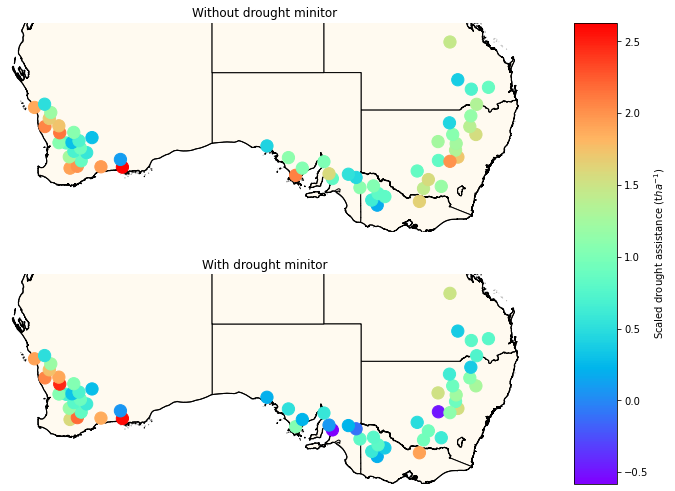

In [39]:
# June drought assistance 
all_as = np.array([df_geo.AverageYield, post_ch_geo.JunAs])
min_val, max_val = np.amin(all_as), np.amax(all_as)

fig, axs = plt.subplots(2,1, subplot_kw=dict(projection=ccrs.PlateCarree()))
# Without drought monitor 
axs[0].set_extent([112.5, 154, -37, -22])
axs[0].coastlines(color='black', linewidth=1, resolution='50m')
axs[0].set_title('Without drought minitor')
axs[0].set_axis_off()
axs[0].add_feature(state_feature, 
                     facecolor="floralwhite", 
                     zorder=1)
df_geo.plot(column = 'AverageYield', 
            cmap = 'rainbow',
            vmin = min_val,
            vmax = max_val,
            ax = axs[0],
            markersize=150, 
#            legend=True, 
            zorder=2)
# With drought monitor 
axs[1].set_extent([112.5, 154, -37, -22])
axs[1].coastlines(color='black', linewidth=1, resolution='50m')
axs[1].set_title('With drought minitor')
axs[1].set_axis_off()
axs[1].add_feature(state_feature, 
                     facecolor="floralwhite", 
                     zorder=1)
cax = plt.axes([0.82, 0.1, 0.05, 0.8])
post_ch_geo.plot(column = 'JunAs', 
            cmap = 'rainbow',
            vmin = min_val,
            vmax = max_val,
            ax = axs[1],
            cax = cax,
            markersize=150, 
            legend=True,
            legend_kwds={'label': "Scaled drought assistance (t$ha^{-1}$)", 'orientation': "vertical"},
            zorder=2)
fig.set_size_inches(12,8)
fig.subplots_adjust(bottom = 0.1, right = 0.8, top = 0.9)
#fig.savefig('wheatbelt2.tiff', dpi = 200)

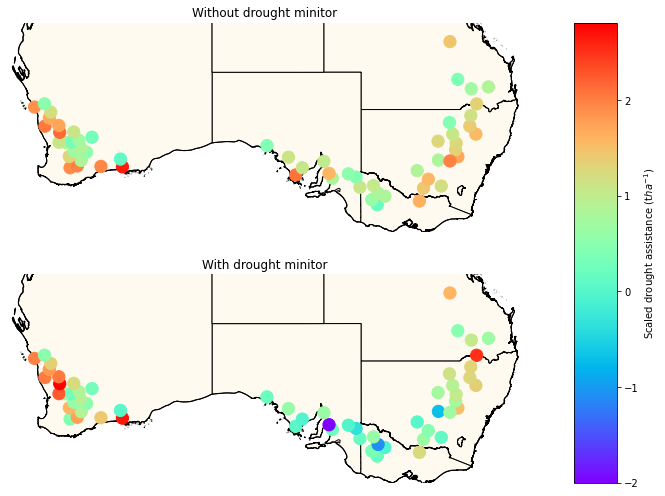

In [40]:
# July drought assistance 
all_as = np.array([df_geo.AverageYield, post_ch_geo.JulAs])
min_val, max_val = np.amin(all_as), np.amax(all_as)

fig, axs = plt.subplots(2,1, subplot_kw=dict(projection=ccrs.PlateCarree()))
# Without drought monitor 
axs[0].set_extent([112.5, 154, -37, -22])
axs[0].coastlines(color='black', linewidth=1, resolution='50m')
axs[0].set_title('Without drought minitor')
axs[0].set_axis_off()
axs[0].add_feature(state_feature, 
                     facecolor="floralwhite", 
                     zorder=1)
df_geo.plot(column = 'AverageYield', 
            cmap = 'rainbow',
            vmin = min_val,
            vmax = max_val,
            ax = axs[0],
            markersize=150, 
#            legend=True, 
            zorder=2)
# With drought monitor 
axs[1].set_extent([112.5, 154, -37, -22])
axs[1].coastlines(color='black', linewidth=1, resolution='50m')
axs[1].set_title('With drought minitor')
axs[1].set_axis_off()
axs[1].add_feature(state_feature, 
                     facecolor="floralwhite", 
                     zorder=1)
cax = plt.axes([0.82, 0.1, 0.05, 0.8])
post_ch_geo.plot(column = 'JulAs', 
            cmap = 'rainbow',
            vmin = min_val,
            vmax = max_val,
            ax = axs[1],
            cax = cax,
            markersize=150, 
            legend=True,
            legend_kwds={'label': "Scaled drought assistance (t$ha^{-1}$)", 'orientation': "vertical"},
            zorder=2)
fig.set_size_inches(12,8)
fig.subplots_adjust(bottom = 0.1, right = 0.8, top = 0.9)
#fig.savefig('wheatbelt2.tiff', dpi = 200)

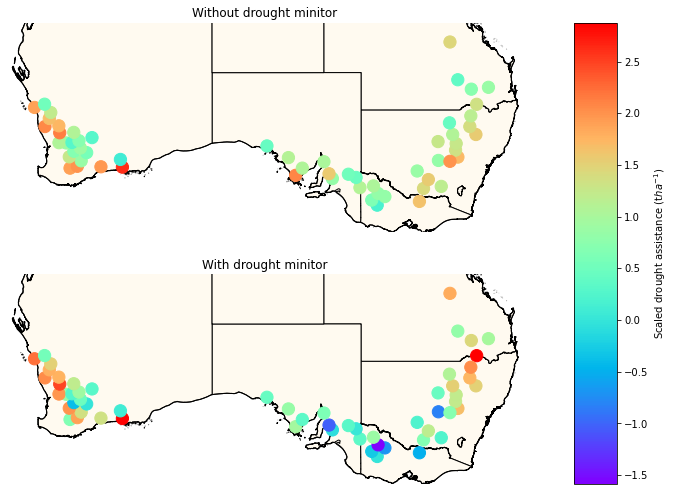

In [41]:
# August drought assistance 
all_as = np.array([df_geo.AverageYield, post_ch_geo.AugAs])
min_val, max_val = np.amin(all_as), np.amax(all_as)

fig, axs = plt.subplots(2,1, subplot_kw=dict(projection=ccrs.PlateCarree()))
# Without drought monitor 
axs[0].set_extent([112.5, 154, -37, -22])
axs[0].coastlines(color='black', linewidth=1, resolution='50m')
axs[0].set_title('Without drought minitor')
axs[0].set_axis_off()
axs[0].add_feature(state_feature, 
                     facecolor="floralwhite", 
                     zorder=1)
df_geo.plot(column = 'AverageYield', 
            cmap = 'rainbow',
            vmin = min_val,
            vmax = max_val,
            ax = axs[0],
            markersize=150, 
#            legend=True, 
            zorder=2)
# With drought monitor 
axs[1].set_extent([112.5, 154, -37, -22])
axs[1].coastlines(color='black', linewidth=1, resolution='50m')
axs[1].set_title('With drought minitor')
axs[1].set_axis_off()
axs[1].add_feature(state_feature, 
                     facecolor="floralwhite", 
                     zorder=1)
cax = plt.axes([0.82, 0.1, 0.05, 0.8])
post_ch_geo.plot(column = 'AugAs', 
            cmap = 'rainbow',
            vmin = min_val,
            vmax = max_val,
            ax = axs[1],
            cax = cax,
            markersize=150, 
            legend=True,
            legend_kwds={'label': "Scaled drought assistance (t$ha^{-1}$)", 'orientation': "vertical"},
            zorder=2)
fig.set_size_inches(12,8)
fig.subplots_adjust(bottom = 0.1, right = 0.8, top = 0.9)
#fig.savefig('wheatbelt2.tiff', dpi = 200)

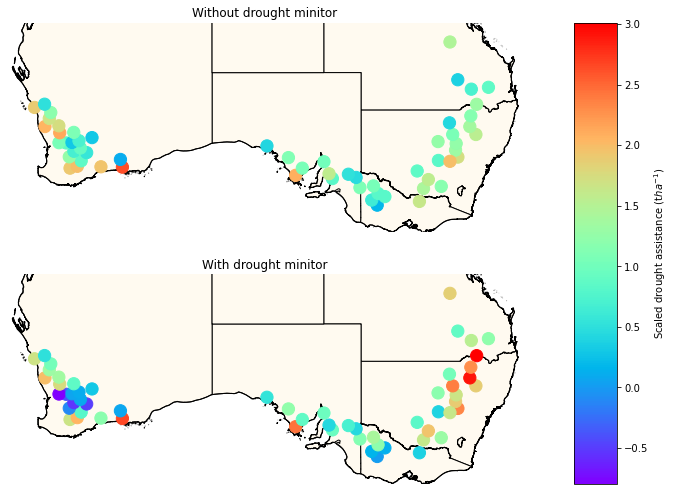

In [42]:
# September drought assistance 
all_as = np.array([df_geo.AverageYield, post_ch_geo.SepAs])
min_val, max_val = np.amin(all_as), np.amax(all_as)

fig, axs = plt.subplots(2,1, subplot_kw=dict(projection=ccrs.PlateCarree()))
# Without drought monitor 
axs[0].set_extent([112.5, 154, -37, -22])
axs[0].coastlines(color='black', linewidth=1, resolution='50m')
axs[0].set_title('Without drought minitor')
axs[0].set_axis_off()
axs[0].add_feature(state_feature, 
                     facecolor="floralwhite", 
                     zorder=1)
df_geo.plot(column = 'AverageYield', 
            cmap = 'rainbow',
            vmin = min_val,
            vmax = max_val,
            ax = axs[0],
            markersize=150, 
#            legend=True, 
            zorder=2)
# With drought monitor 
axs[1].set_extent([112.5, 154, -37, -22])
axs[1].coastlines(color='black', linewidth=1, resolution='50m')
axs[1].set_title('With drought minitor')
axs[1].set_axis_off()
axs[1].add_feature(state_feature, 
                     facecolor="floralwhite", 
                     zorder=1)
cax = plt.axes([0.82, 0.1, 0.05, 0.8])
post_ch_geo.plot(column = 'SepAs', 
            cmap = 'rainbow',
            vmin = min_val,
            vmax = max_val,
            ax = axs[1],
            cax = cax,
            markersize=150, 
            legend=True,
            legend_kwds={'label': "Scaled drought assistance (t$ha^{-1}$)", 'orientation': "vertical"},
            zorder=2)
fig.set_size_inches(12,8)
fig.subplots_adjust(bottom = 0.1, right = 0.8, top = 0.9)
#fig.savefig('wheatbelt2.tiff', dpi = 200)

## Economic value of the drought monitor information

In [43]:
# Scaled economic values for each month at all sites
eco_val = pd.DataFrame({})
eco_val['Sites'] = df_station.Sites
eco_val['AprVal'] = df_station['April CDI']**2*df_station['VarYield']
eco_val['MayVal'] = df_station['May CDI']**2*df_station['VarYield']
eco_val['JunVal'] = df_station['June CDI']**2*df_station['VarYield']
eco_val['JulVal'] = df_station['July CDI']**2*df_station['VarYield']
eco_val['AugVal'] = df_station['August CDI']**2*df_station['VarYield']
eco_val['SepVal'] = df_station['September CDI']**2*df_station['VarYield']
#eco_val['Latitude'] = df_station.Latitude
#eco_val['Longitude'] = df_station.Longitude 
df_eco = gpd.GeoDataFrame(eco_val, geometry = gpd.points_from_xy(df_station.Longitude, df_station.Latitude))
df_eco

,Sites,AprVal,MayVal,JunVal,JulVal,AugVal,SepVal,geometry
0,Goondiwindi,4.801589e-04,0.079999,1.429592e-01,0.300706,0.408051,0.386377,POINT (150.31000 -28.55000)
1,Meandarra,1.139821e-02,0.049537,6.243138e-03,0.035251,0.115680,0.164592,POINT (149.88000 -27.33000)
2,Dalby,2.849741e-02,0.086252,3.838693e-03,0.019146,0.096720,0.272745,POINT (151.26000 -27.18000)
3,Roma,1.073327e-02,0.010524,3.528656e-04,0.009269,0.041868,0.104261,POINT (148.79000 -26.57000)
4,Emerald,6.961275e-04,0.000796,1.807325e-02,0.054962,0.064972,0.090411,POINT (148.16000 -23.53000)
5,Condobolin,5.284322e-03,0.037649,1.228942e-01,0.228654,0.208863,0.189033,POINT (147.23000 -33.07000)
6,Wellington,3.919487e-03,0.018099,1.787893e-02,0.052026,0.037267,0.075618,POINT (148.80000 -32.80000)
7,Dubbo,2.084305e-04,0.068953,4.721309e-02,0.115580,0.171738,0.246374,POINT (148.61000 -32.24000)
8,Gilgandra,2.092934e-09,0.016599,1.571976e-04,0.021245,0.048054,0.110189,POINT (148.66000 -31.71000)
9,Nyngan,1.887521e-02,0.001437,4.573374e-03,0.019612,0.141122,0.310007,POINT (147.20000 -31.55000)


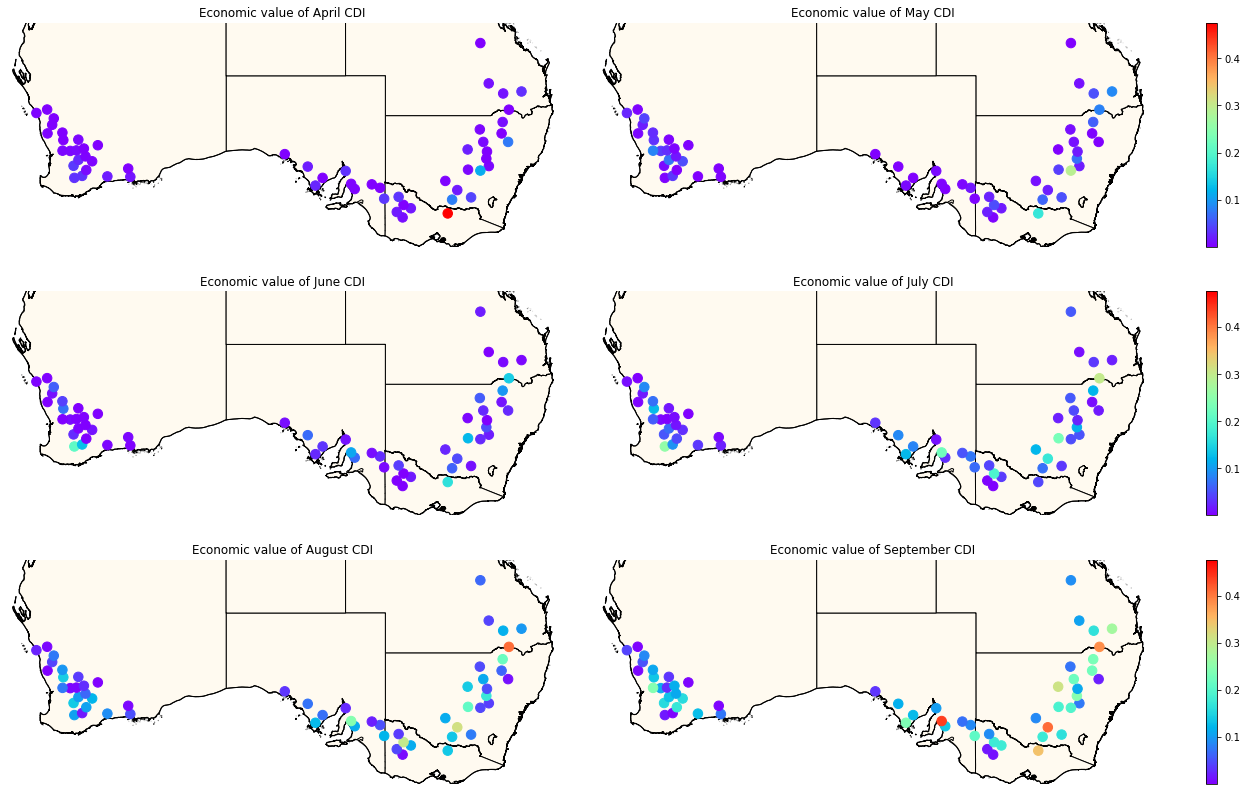

In [44]:
# Mapping
all_val = np.array([eco_val.AprVal, eco_val.MayVal, eco_val.JunVal, eco_val.JulVal, eco_val.AugVal, eco_val.SepVal])
min_val, max_val = np.amin(all_val), np.amax(all_val)
#
fig, axs = plt.subplots(3,2, subplot_kw=dict(projection=ccrs.PlateCarree()))
# April economic values
axs[0,0].set_extent([112.5, 154, -37, -22])
axs[0,0].coastlines(color='black', linewidth=1, resolution='50m')
axs[0,0].set_title('Economic value of April CDI')
axs[0,0].set_axis_off()
axs[0,0].add_feature(state_feature, 
                     facecolor="floralwhite", 
                     zorder=1)
df_eco.plot(column = 'AprVal', 
            cmap = 'rainbow',
            vmin = min_val,
            vmax = max_val,
            ax = axs[0,0],
            markersize=90, 
#            legend=True, 
            zorder=2)
#
# May CDI
axs[0,1].set_extent([112.5, 154, -37, -22])
axs[0,1].coastlines(color='black', linewidth=1, resolution='50m')
axs[0,1].set_title('Economic value of May CDI')
axs[0,1].set_axis_off()
axs[0,1].add_feature(state_feature, 
                     facecolor="floralwhite", 
                     zorder=1)
df_eco.plot(column = 'MayVal', 
            cmap = 'rainbow',
            vmin = min_val,
            vmax = max_val,
            ax = axs[0,1],
            markersize=90, 
            legend=True, 
            zorder=2)
#
# June CDI
axs[1,0].set_extent([112.5, 154, -37, -22])
axs[1,0].coastlines(color='black', linewidth=1, resolution='50m')
axs[1,0].set_title('Economic value of June CDI')
axs[1,0].set_axis_off()
axs[1,0].add_feature(state_feature, 
                     facecolor="floralwhite", 
                     zorder=1)
df_eco.plot(column = 'JunVal', 
            cmap = 'rainbow',
            vmin = min_val,
            vmax = max_val,
            ax = axs[1,0],
            markersize=90, 
#            legend=True, 
            zorder=2)
#
# July CDI
axs[1,1].set_extent([112.5, 154, -37, -22])
axs[1,1].coastlines(color='black', linewidth=1, resolution='50m')
axs[1,1].set_title('Economic value of July CDI')
axs[1,1].set_axis_off()
axs[1,1].add_feature(state_feature, 
                     facecolor="floralwhite", 
                     zorder=1)
df_eco.plot(column = 'JulVal', 
            cmap = 'rainbow',
            vmin = min_val,
            vmax = max_val,
            ax = axs[1,1],
            markersize=90, 
            legend=True,
            zorder=2)
#
# August CDI
axs[2,0].set_extent([112.5, 154, -37, -22])
axs[2,0].coastlines(color='black', linewidth=1, resolution='50m')
axs[2,0].set_title('Economic value of August CDI')
axs[2,0].set_axis_off()
axs[2,0].add_feature(state_feature, 
                     facecolor="floralwhite", 
                     zorder=1)
df_eco.plot(column = 'AugVal', 
            cmap = 'rainbow',
            vmin = min_val,
            vmax = max_val,
            ax = axs[2,0],
            markersize=90, 
#            legend=True, 
            zorder=2)
#
# September CDI
axs[2,1].set_extent([112.5, 154, -37, -22])
axs[2,1].coastlines(color='black', linewidth=1, resolution='50m')
axs[2,1].set_title('Economic value of September CDI')
axs[2,1].set_axis_off()
axs[2,1].add_feature(state_feature, 
                     facecolor="floralwhite", 
                     zorder=1)
df_eco.plot(column = 'SepVal', 
            cmap = 'rainbow',
            vmin = min_val,
            vmax = max_val,
            ax = axs[2,1],
            markersize=90, 
            legend=True, 
            zorder=2)
#
fig.set_size_inches(30,14)
fig.subplots_adjust(wspace=-0.55)
#fig.savefig('wheatbelt2.tiff', dpi = 200)